In [112]:
import pandas as pd
import numpy as np
import re
import underthesea
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv("./merged_shuffled.csv")
print(df.head())
print(len(df))
print(df["support"].value_counts())


                                             comment label  rate  support
0  Cho mình hỏi ghế gấp này có bị bay màu sau thờ...   NEU     3        1
1        Có phụ kiện nào đi kèm với váy này không ạ?   NEU     3        1
2  Bản quốc tế nên khi bật hoặc kết nối có thông ...   POS     4        0
3  Mình đang tìm hiểu về váy, không biết mẫu này ...   NEU     3        1
4  Máy bạn mua đồ lót tốt nhất đừng mua rẻ quá ti...   POS     4        0
20038
support
0    10037
1    10001
Name: count, dtype: int64


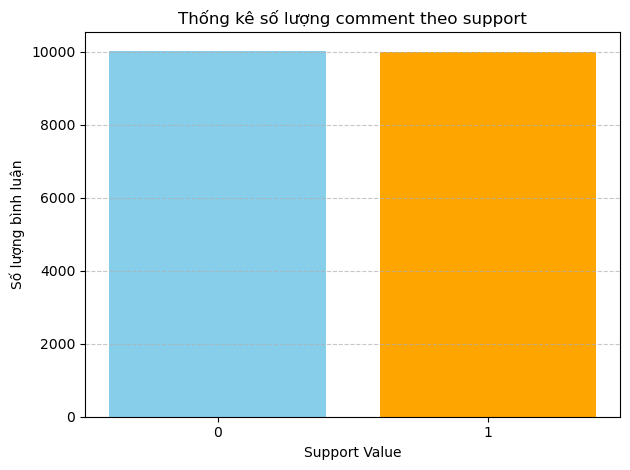

In [116]:
import pandas as pd


# Đếm số lượng 0 và 1 trong cột 'support'
count_support = df["support"].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.bar(count_support.index.astype(str), count_support.values, color=["skyblue", "orange"])
plt.xlabel("Support Value")
plt.ylabel("Số lượng bình luận")
plt.title("Thống kê số lượng comment theo support")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [118]:
#đưa về chữ thường
df["comment"] = df["comment"].str.lower()
df.head()

,comment,label,rate,support
0,cho mình hỏi ghế gấp này có bị bay màu sau thờ...,NEU,3,1
1,có phụ kiện nào đi kèm với váy này không ạ?,NEU,3,1
2,bản quốc tế nên khi bật hoặc kết nối có thông ...,POS,4,0
3,"mình đang tìm hiểu về váy, không biết mẫu này ...",NEU,3,1
4,máy bạn mua đồ lót tốt nhất đừng mua rẻ quá ti...,POS,4,0


In [120]:
#loại bỏ số
df["comment"] = df["comment"].astype(str).str.replace(r'\d+', '', regex=True)
df.head()

,comment,label,rate,support
0,cho mình hỏi ghế gấp này có bị bay màu sau thờ...,NEU,3,1
1,có phụ kiện nào đi kèm với váy này không ạ?,NEU,3,1
2,bản quốc tế nên khi bật hoặc kết nối có thông ...,POS,4,0
3,"mình đang tìm hiểu về váy, không biết mẫu này ...",NEU,3,1
4,máy bạn mua đồ lót tốt nhất đừng mua rẻ quá ti...,POS,4,0


In [122]:
#Loại bỏ dấu câu
df["comment"] = df["comment"].astype(str).str.replace(r'[^\w\s]', '', regex=True)

In [124]:
df.head()


,comment,label,rate,support
0,cho mình hỏi ghế gấp này có bị bay màu sau thờ...,NEU,3,1
1,có phụ kiện nào đi kèm với váy này không ạ,NEU,3,1
2,bản quốc tế nên khi bật hoặc kết nối có thông ...,POS,4,0
3,mình đang tìm hiểu về váy không biết mẫu này c...,NEU,3,1
4,máy bạn mua đồ lót tốt nhất đừng mua rẻ quá ti...,POS,4,0


In [126]:
# Loại bỏ khoảng trắng dư thừa
df["comment"] = df["comment"].astype(str).str.replace(r'\s+', ' ', regex=True).str.strip()


In [128]:
df.head()


,comment,label,rate,support
0,cho mình hỏi ghế gấp này có bị bay màu sau thờ...,NEU,3,1
1,có phụ kiện nào đi kèm với váy này không ạ,NEU,3,1
2,bản quốc tế nên khi bật hoặc kết nối có thông ...,POS,4,0
3,mình đang tìm hiểu về váy không biết mẫu này c...,NEU,3,1
4,máy bạn mua đồ lót tốt nhất đừng mua rẻ quá ti...,POS,4,0


In [130]:
# Loại bỏ các chữ cái giống nhau liên tiếp 
df["comment"] = df["comment"].astype(str).str.replace(r'(.)\1+', r'\1', regex=True)


In [132]:
df.head()


,comment,label,rate,support
0,cho mình hỏi ghế gấp này có bị bay màu sau thờ...,NEU,3,1
1,có phụ kiện nào đi kèm với váy này không ạ,NEU,3,1
2,bản quốc tế nên khi bật hoặc kết nối có thông ...,POS,4,0
3,mình đang tìm hiểu về váy không biết mẫu này c...,NEU,3,1
4,máy bạn mua đồ lót tốt nhất đừng mua rẻ quá ti...,POS,4,0


In [134]:
# Tách từ trong cột 'comment'
from underthesea import word_tokenize
df["comment"] = df["comment"].apply(lambda x: word_tokenize(x))

print(df["comment"].head())

0    [cho, mình, hỏi, ghế, gấp, này, có, bị, bay, m...
1    [có, phụ kiện, nào, đi, kèm, với, váy, này, kh...
2    [bản, quốc tế, nên, khi, bật, hoặc, kết nối, c...
3    [mình, đang, tìm hiểu, về, váy, không, biết, m...
4    [máy, bạn, mua, đồ lót, tốt, nhất, đừng, mua, ...
Name: comment, dtype: object


In [135]:
#Chuẩn hóa dữ liệu
replace_list = {
       ':v':'hihi', '<3':'yêu', '♥️':'yêu','❤':'yêu','a':'anh','ac':'anh chị','ace':'anh chị em','ad':'quản lý',
       'ae':'anh em','ak':'à','amin':'quản lý','androir':'android','app':'ứng dụng','auto ':'tự động',
       'ây':'vậy','b nào':'bạn nào','bằg':'bằng','băng':'bằng','băp':'bắp','băt':'bắt','battery':'pin','bể':'vỡ',
       'been':'bên','best':'nhất','best':'tốt nhất','bgqafy ':'ngày','bh':'bao giờ','bh':'bây giờ','bhx':'bảo hành',
       'bi':'bị','big':'lớn','bik':'biết','bin':'pin','bit':'biết','bít':'biết','bn':'bạn','bông tróc':'bong tróc', 'k': 'không', 'ok': 'được',
       'bro':'anh em','bt':'bình thường','bt':'biết','bth':'bình thường','bthg':'bình thường','bua':'bữa','bùn':'buồn',
       'buonc':'buồn','bx':'hộp','bye':'tạm biệt','c':'chị','cac':'các','cam':'máy ảnh','card':'thẻ','châu':'khỏe',
       'chiệu':'triệu','chíp':'chip','chội':'trội','chs':'chơi','chửa':'chữa','chug ':'chung','chup':'chụp','chuq':'chung',
       'clip':'đoạn phim','cmt':'bình luận','co':'có','cở':'cỡ','cọc':'cột','cpu':'chíp xử lý','cty':'công ty',
       'cua':'của','cũg':'cũng','cug ':'cũng','cuh':'cũng','cùi':'tệ','củng':'cũng','cụt':'cục','cv':'công việc',
       'cx':'cũng','đ':' đồng','dag':'đang','dăng':'văng','dấp':'lỗi','dất':'rất','đay':'đấy','đâỳ':'đầy','đc':'được',
       'dè':'rè','dể':'dễ','delay':'trễ','dêm':'đêm','đén':'đến','deplay ':'chậm','deu':'đều','diem':'điểm','dien':'diện',
       'đien':'điển','điễn':'điển','dienmayxanh':'điện máy xanh','dín':'dính','dis':'văng','diss':'văng','dk':'được',
       'dmx':'điện máy xanh','dô':'vào','dõ':'rõ','dỡ':'dở','đỗi':'đổi','download':'tải','drop':'tụt','dt':'điện thoại',
       'đt':'điện thoại','đth':'điện thoại','đthoai':'điện thoại','du':'dù','dùg':'dùng','dừg':'dừng','đứg':'đứng',
       'dụg ':'dụng','dung':'dùng','đụng':'chạm','đươc':'được','đuọc ':'được','đưowjc':'được','dựt ':'giật','dx':'được'
       ,'đx':'được','đy':'đi','e':'em','ế':'không bán được','êm':'tốt','f':'facebook','fabook':'facebook',
       'face':'facebook','fast':'nhanh','fb':'facebook','fim':'phim','fix':'sửa','flash sale':'giảm giá','fm':'đài',
       'for what':'vì sao','fps':'tốc độ khung hình','full':'đầy','future':'tương lai','game':'trò chơi','gem':'trò chơi',
       'geme':'trò chơi','gia tiên':'giá tiền','giât':'giật','giốg ':'giống','giử':'dữ','giùm':'dùm','gmae':'trò chơi',
       'gởi':'gửi','gold':'vàng','gơn':'hơn','good':'tốt','good jup':'tốt','gop':'góp','gửa':'gửi','gủng':'cái','h':'giờ',
       'haiz':'thở dài','hẵn ':'hẳn','hành':'hành','hazzz':'haizz','hc':'học','hcm':'hồ chí minh','hd':'chất lượng cao',
       'hdh':'hệ điều hành','hđh':'hệ điều hành','headphone':'tai nghe','hên':'may mắn','hẻo':'yếu','hẹo':'yếu','het':'hết',
       'hét':'hết','hic':'khóc','hieu':'hiểu','high-tech':'công nghệ cao','hít':'sử dụng','hiu':'hiểu','hỉu':'hiểu',
       'hk':'không','hn':'hà nội','hnay':'hôm nay','hoài':'nhiều lần','hoi':'hơi','hới':'hơi','hời':'tốt',
       'hoi han':'hối hận','hok':'không','hong':'không','hông':'không','hot':'nổi bật','hqua':'hôm qua','hs':'học sinh',
       'hssv':'học sinh sinh viên','hut':'hút','huway ':'huawei','huwei ':'huawei','í':'ý','I like it':'tôi thích nó',
       'ik':'đi','ip':'iphone','j':'gì','k':'không','kàm':'làm','kb':'không biết','kg':'không','kh':'không',
       'khach':'khách hàng','khát phục':'khắc phục','khj':'khi','khoá ':'khóa','khóai ':'thích','khoẻ':'khỏe',
       'khoẽ':'khỏe','khôg':'không','khoi đong':'khởi động','khong':'không','khoong ':'không','khuân':'khuôn',
       'khủg':'khủng','kím':'kiếm','kipo':'tiêu cực','ko':'không','kt':'kiểm tra','ktra':'kiểm tra','la':'là',
       'lác':'lỗi','lắc':'lỗi','lag':'lỗi','laii':'lại','lak':'giật','lan':'lần','lãng':'giật','lap':'máy tính',
       'laptop':'máy tính','lay':'này','len toi':'lên tới','les':'led','lg':'lượng','lí':'lý','lien':'liên',
       'like':'thích','liti':'nhỏ','live stream':'phát sóng trực tiếp','lm':'làm','ln':'luôn','loadd':'tải ',
       'lôi':'lỗi','lổi':'lỗi','LOL ':'trò chơi','lởm':'kém chất lượng','lỏng lẽo':'lỏng lẻo','luc':'lúc','lun':'luôn',
       'luong':'lượng','luot':'lướt','lưot ':'lượt','m':'mình','mạ':'trời','mắc công':'mất công','macseger':'messenger',
       'mag':'màn','main':'chính','mak':'mà','man':'màn','màng':'màn','màng hình':'màn hình','mao ':'mau','mẩu':'mẫu',
       'mầu ':'màu','max':'lớn nhất','may':'máy','mèn':'màn','méo gì':'làm gì','mih':'mình','mìk':'mình','min':'nhỏ nhât',
       'mìn':'mình','mjh':'mình','mjk':'mình','mjnh':'minh','mk':'mình','mn':'mọi người','mng ':'mọi người','mo':'đâu',
       'mò':'tìm','mobile':'điện thoại','mog':'mong','moi':'mới','mơi':'mới','ms':'mới','mún':'muốn','mước':'mức',
       'mược':'mượt','muot':'mượt','mỷ':'mỹ','n':'nó','n':'nói chuyện','nãn':'nản','nayd':'này','nc':'nói chuyện',
       'nch':'nói chuyện','nch':'nói chung','nếo ':'nếu','ng':'người','ngan':'ngang','nge':'nghe','nghiêm':'nghiệm',
       'ngĩ':'nghĩ','ngốn':'sử dụng','nguon':'nguồn','nhah':'nhanh','nhan vien':'nhân viên','nhay':'nhạy','nhe':'nhé',
       'nhèo':'nhòe','nhiet':'nhiệt','nhiểu':'nhiều','nhiu':'nhiều','nhìu':'nhiều','nhoè':'nhòe','như v':'như vậy',
       'nhug':'nhưng','nhưg':'nhưng','nhữg':'những','nhung':'nhưng','nhuoc':'nhược','nhượt':'nhược','nock ao':'hạ gục',
       'noi':'nói','nống':'nóng','not':'lưu ý','ns ':'nói','nsx':'ngày sản xuất','nt':'nhắn tin','ntin':'nhắn tin',
       'ntn':'như thế nào','nũa':'nữa','nut ':'nút','nv':'nhân viên','nz':'như vậy','ô xi':'oxy','ofice':'văn phòng',
       'ok':'được','ôk':'được','oke':'được','okee':'được','oki':'được','okie':'được','onl':'sử dụng',
       'ộp ẹp':'không chắc chắn','option':'tùy chọn','or':'hoặc','out':'thoát','oỳ':'rồi','pải':'phải','phảm':'phẩm',
       'phẩn':'phẩm','phan van':'phân vân','phèo':'vậy','phut ':'phút','pít':'biết','pro':'chất lượng cao','pùn':'buồn',
       'pv':'giới thiệu','qá':'quá','qc':'quảng cáo','qtv':'quản trị viên','qua ve':'qua vẻ','quang trọng':'quan trọng',
       'qus':'quá','r ':'rồi','rat':'rất','rát':'rất','rắt':'rất','rata':'rất','rễ':'dễ','rep':'trả lời',
       'research':'nghiên cứu','reset':'cài đặt lại','restart':'khởi động lại','review':'đánh giá','rì':'gì',
       'rinh':'mua','rỏ':'rõ','rùi':'rồi','rùng':'dùng','s':'sao','sac':'sạc','sài':'xài','sài':'dùng','sale':'giảm giá',
       'sale off':'giảm giá','sâng':'sáng','sạt':'sạc','saving':'tiết kiệm','sd':'sử dụng','sdt':'số điện thoại',
       'seal':'mới','search':'tìm kiếm','sefil':'chụp ảnh','selfie':'chụp ảnh','setting':'cài đặt','setup':'cài đặt',
       'sexy':'quyến rũ','shiper':'nhân viên giao hàng','shop':'cửa hàng','skill':'kỹ năng','smooth':'mượt',
       'so good':'rất tốt','sp':'sản phẩm','sphẩm':'sản phẩm','stars':'sao','sử':'xử','suất':'xuất','sưj':'sự',
       'sước':'xước','super':'siêu','support':'hỗ trợ','sụt':'tụt','sv':'sinh viên','sx':'sản xuất','t':'tôi',
       'T G D Đ':'thế giới di động','tằm ':'tầm','tes':'kiểm tra','test':'kiểm tra','tet':'tết','teung':'trung',
       'tg':'thời gian','tgdd':'thế giới di động','tgdđ':'thế giới di động','thag':'tháng','thág':'tháng','ship':'giao','Ship':'giao',
       'kh':'không','mik':'mình','j':'gì','ah':'ạ','nhiu':'nhiêu','mk':'mình',
}
pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sorted(replace_list, key=lambda x: -len(x))) + r')\b')
def Util(text):
    return pattern.sub(lambda match: replace_list[match.group(0)], text.lower())
df['comment'] = df['comment'].astype(str).apply(Util)


df['comment'] = df['comment'].apply(lambda x: Util(x) if isinstance(x, str) else "")



df['comment'] = df['comment'].apply(Util)

In [136]:
df.head()

,comment,label,rate,support
0,"['cho', 'mình', 'hỏi', 'ghế', 'gấp', 'này', 'c...",NEU,3,1
1,"['có', 'phụ kiện', 'nào', 'đi', 'kèm', 'với', ...",NEU,3,1
2,"['bản', 'quốc tế', 'nên', 'khi', 'bật', 'hoặc'...",POS,4,0
3,"['mình', 'đang', 'tìm hiểu', 'về', 'váy', 'khô...",NEU,3,1
4,"['máy', 'bạn', 'mua', 'đồ lót', 'tốt', 'nhất',...",POS,4,0


In [137]:
#bỏ icon
import re

# Regex lọc emoji Unicode (emoji mặt cười, cờ, biểu tượng cảm xúc, động vật,...)
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # Mặt cười
    "\U0001F300-\U0001F5FF"  # Biểu tượng khác
    "\U0001F680-\U0001F6FF"  # Vận chuyển
    "\U0001F1E0-\U0001F1FF"  # Cờ các nước
    "\U00002700-\U000027BF"  # Các ký hiệu khác
    "\U000024C2-\U0001F251"
    "]+",
    flags=re.UNICODE
)

def remove_emojis(text):
    if not isinstance(text, str):
        return ""
    return emoji_pattern.sub(r'', text)
df['comment'] = df['comment'].apply(remove_emojis)


In [138]:
df.head()


,comment,label,rate,support
0,"['cho', 'mình', 'hỏi', 'ghế', 'gấp', 'này', 'c...",NEU,3,1
1,"['có', 'phụ kiện', 'nào', 'đi', 'kèm', 'với', ...",NEU,3,1
2,"['bản', 'quốc tế', 'nên', 'khi', 'bật', 'hoặc'...",POS,4,0
3,"['mình', 'đang', 'tìm hiểu', 'về', 'váy', 'khô...",NEU,3,1
4,"['máy', 'bạn', 'mua', 'đồ lót', 'tốt', 'nhất',...",POS,4,0


In [139]:
print(df.dtypes)

comment    object
label      object
rate        int64
support     int64
dtype: object


In [140]:
df.to_csv("data_complete.csv", index = False)

In [141]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Đọc dữ liệu từ file CSV
df = pd.read_csv('data_complete.csv')

# Tạo nhãn phân tầng kết hợp từ 2 cột
df['label_support'] = df['label'].astype(str) + '_' + df['support'].astype(str)

# Khởi tạo đối tượng stratified splitter cho train và temp (val + test)
splitter_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, temp_idx in splitter_1.split(df, df['label_support']):
    train_data = df.iloc[train_idx]
    temp_data = df.iloc[temp_idx]

# Chia tiếp temp thành val (10%) và test (20%) → tức là val chiếm ~1/3 của temp
splitter_2 = StratifiedShuffleSplit(n_splits=1, test_size=2/3, random_state=42)
for val_idx, test_idx in splitter_2.split(temp_data, temp_data['label_support']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

# Xoá cột phụ trước khi lưu
for dataset in [train_data, val_data, test_data]:
    dataset.drop(columns=['label_support'], inplace=True)

# Lưu ra 3 file CSV
train_data.to_csv('train_70data.csv', index=False)
val_data.to_csv('val_10data.csv', index=False)
test_data.to_csv('test_20data.csv', index=False)

print("Tách dữ liệu hoàn tất!")


Tách dữ liệu hoàn tất!


C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\195212740.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['label_support'], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\195212740.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['label_support'], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\195212740.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [142]:
df = pd.read_csv("./train_70data.csv")

In [144]:
print(df.head())
print(df['support'].value_counts())
print(df['label'].value_counts())

                                             comment label  rate  support
0  ['vải', 'nhăn', 'chất lượng', 'không', 'giống'...   POS     4        0
1  ['không', 'biết', 'cửa hàng', 'có', 'xử lý', '...   NEG     2        1
2  ['mình', 'thấy', 'chất lượng', 'sản phẩm', 'tu...   POS     4        0
3  ['mình', 'cần', 'xử dụng', 'máy in', 'này', 'ở...   NEU     3        1
4  ['mình', 'không', 'quen', 'mua', 'online', 'nh...   NEU     3        1
support
0    7025
1    7001
Name: count, dtype: int64
label
POS    8127
NEU    5001
NEG     898
Name: count, dtype: int64


In [154]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import underthesea

# Load dữ liệu
df = pd.read_csv("train_70data.csv")

# Tiền xử lý văn bản
def preprocess_text(text):
    return ' '.join(underthesea.word_tokenize(str(text)))

df['comment'] = df['comment'].astype(str).apply(preprocess_text)

# Encode nhãn support
label_encoder = LabelEncoder()
df['support'] = label_encoder.fit_transform(df['support'])  # 0 hoặc 1

# Tokenizer
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['comment'])
sequences = tokenizer.texts_to_sequences(df['comment'])

# Padding
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
y = df['support'].values  # Không cần one-hot vì là binary

# ----------- 3. Load tập validation từ file riêng ----------
val_df = pd.read_csv("val_10data.csv")

# Tiền xử lý y như tập train
val_df['comment'] = val_df['comment'].astype(str).apply(preprocess_text)
val_df['support'] = label_encoder.transform(val_df['support'])  # dùng cùng encoder

# Tokenize và pad
val_sequences = tokenizer.texts_to_sequences(val_df['comment'])
X_val = pad_sequences(val_sequences, maxlen=maxlen, padding='post', truncating='post')
y_val = val_df['support'].values


# Xây mô hình
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

inputs = Input(shape=(maxlen,))
embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)

lstm = Bidirectional(LSTM(64, return_sequences=True))(embedding)
lstm = Bidirectional(LSTM(64))(lstm)
dropout = Dropout(0.5)(lstm)
output = Dense(1, activation='sigmoid')(dropout)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
439/439 [==============================] - 21s 40ms/step - loss: 0.1214 - accuracy: 0.9528 - val_loss: 0.0599 - val_accuracy: 0.9810
Epoch 2/10
439/439 [==============================] - 17s 39ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0654 - val_accuracy: 0.9785
Epoch 3/10
439/439 [==============================] - 17s 38ms/step - loss: 0.0391 - accuracy: 0.9892 - val_loss: 0.0786 - val_accuracy: 0.9775
Epoch 4/10
439/439 [==============================] - 17s 38ms/step - loss: 0.0296 - accuracy: 0.9924 - val_loss: 0.0624 - val_accuracy: 0.9865
Epoch 5/10
439/439 [==============================] - 16s 37ms/step - loss: 0.0240 - accuracy: 0.9937 - val_loss: 0.0654 - val_accuracy: 0.9830
Epoch 6/10
439/439 [==============================] - 17s 38ms/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0681 - val_accuracy: 0.9830
Epoch 7/10
439/439 [==============================] - 16s 37ms/step - loss: 0.0185 - accuracy: 0.9954 - val_loss: 0.0590 - val_accuracy:

In [156]:
model.save("support_model.keras")

# Lưu tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Lưu label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("✅ Đã lưu mô hình và các đối tượng hỗ trợ!")

✅ Đã lưu mô hình và các đối tượng hỗ trợ!


In [193]:
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import underthesea

# ------- 1. Load mô hình và tokenizer -------
model = load_model("support_model.keras")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Nếu bạn vẫn dùng label_encoder:
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)
def preprocess_text(text):
    return ' '.join(underthesea.word_tokenize(str(text)))
# ------- 2. Load và xử lý dữ liệu test -------
test_df = pd.read_csv("shuffled_test_support_only.csv")

# Đảm bảo cột 'comment' là string và tokenize
test_df['comment'] = test_df['comment'].astype(str).apply(lambda x: ' '.join(underthesea.word_tokenize(x)))
test_df['comment'] = test_df['comment'].astype(str).apply(preprocess_text)
# Encode nhãn
test_df['support'] = label_encoder.transform(test_df['support'])

# Chuẩn bị dữ liệu
sequences = tokenizer.texts_to_sequences(test_df['comment'])
X_test = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
y_test = test_df['support'].values

# ------- 3. Dự đoán -------
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# ------- 4. Đánh giá -------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(" Đánh giá mô hình LSTM:")
print(f"Accuracy:  {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall:    {recall:.4f}")
print(f" F1-score:  {f1:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0,digits=4))

# ------- 3.5. Hiển thị các comment bị dự đoán sai -------
#test_df['pred'] = y_pred
#test_df['true'] = y_test
#test_df['is_wrong'] = test_df['pred'] != test_df['true']

# Lọc các comment sai
#wrong_predictions = test_df[test_df['is_wrong'] == True]

# Hiển thị
#print("\n Các comment bị dự đoán sai:")
#print(wrong_predictions[['comment', 'true', 'pred']])

# (Tùy chọn) Lưu ra file CSV để phân tích sau
#wrong_comment = wrong_predictions["comment"]
#wrong_comment.to_csv("wrong_predictions_no.csv", index=False)


32/32 [==============================] - 1s 14ms/step
 Đánh giá mô hình LSTM:
Accuracy:  0.9102
 Precision: 0.9047
 Recall:    0.9172
 F1-score:  0.9109

 Classification Report:
              precision    recall  f1-score   support

           0     0.9158    0.9032    0.9095       506
           1     0.9047    0.9172    0.9109       507

    accuracy                         0.9102      1013
   macro avg     0.9103    0.9102    0.9102      1013
weighted avg     0.9102    0.9102    0.9102      1013



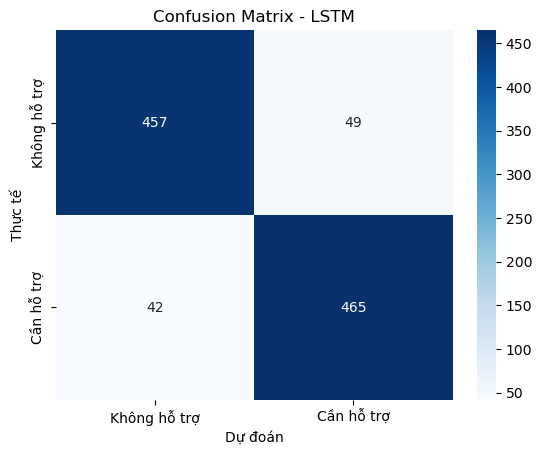

In [194]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không hỗ trợ', 'Cần hỗ trợ'],
            yticklabels=['Không hỗ trợ', 'Cần hỗ trợ'])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - LSTM")
plt.show()

In [12]:
import re
import pickle
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import underthesea

# ---------- Load mô hình và tokenizer ----------
from tensorflow.keras.models import load_model
model = load_model("support_model.keras")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

#Chuẩn hóa dữ liệu
replace_list = {
       ':v':'hihi', '<3':'yêu', '♥️':'yêu','❤':'yêu','a':'anh','ac':'anh chị','ace':'anh chị em','ad':'quản lý',
       'ae':'anh em','ak':'à','amin':'quản lý','androir':'android','app':'ứng dụng','auto ':'tự động',
       'ây':'vậy','b nào':'bạn nào','bằg':'bằng','băng':'bằng','băp':'bắp','băt':'bắt','battery':'pin','bể':'vỡ',
       'been':'bên','best':'nhất','best':'tốt nhất','bgqafy ':'ngày','bh':'bao giờ','bh':'bây giờ','bhx':'bảo hành',
       'bi':'bị','big':'lớn','bik':'biết','bin':'pin','bit':'biết','bít':'biết','bn':'bạn','bông tróc':'bong tróc', 'k': 'không', 'ok': 'được',
       'bro':'anh em','bt':'bình thường','bt':'biết','bth':'bình thường','bthg':'bình thường','bua':'bữa','bùn':'buồn',
       'buonc':'buồn','bx':'hộp','bye':'tạm biệt','c':'chị','cac':'các','cam':'máy ảnh','card':'thẻ','châu':'khỏe',
       'chiệu':'triệu','chíp':'chip','chội':'trội','chs':'chơi','chửa':'chữa','chug ':'chung','chup':'chụp','chuq':'chung',
       'clip':'đoạn phim','cmt':'bình luận','co':'có','cở':'cỡ','cọc':'cột','cpu':'chíp xử lý','cty':'công ty',
       'cua':'của','cũg':'cũng','cug ':'cũng','cuh':'cũng','cùi':'tệ','củng':'cũng','cụt':'cục','cv':'công việc',
       'cx':'cũng','đ':' đồng','dag':'đang','dăng':'văng','dấp':'lỗi','dất':'rất','đay':'đấy','đâỳ':'đầy','đc':'được',
       'dè':'rè','dể':'dễ','delay':'trễ','dêm':'đêm','đén':'đến','deplay ':'chậm','deu':'đều','diem':'điểm','dien':'diện',
       'đien':'điển','điễn':'điển','dienmayxanh':'điện máy xanh','dín':'dính','dis':'văng','diss':'văng','dk':'được',
       'dmx':'điện máy xanh','dô':'vào','dõ':'rõ','dỡ':'dở','đỗi':'đổi','download':'tải','drop':'tụt','dt':'điện thoại',
       'đt':'điện thoại','đth':'điện thoại','đthoai':'điện thoại','du':'dù','dùg':'dùng','dừg':'dừng','đứg':'đứng',
       'dụg ':'dụng','dung':'dùng','đụng':'chạm','đươc':'được','đuọc ':'được','đưowjc':'được','dựt ':'giật','dx':'được'
       ,'đx':'được','đy':'đi','e':'em','ế':'không bán được','êm':'tốt','f':'facebook','fabook':'facebook',
       'face':'facebook','fast':'nhanh','fb':'facebook','fim':'phim','fix':'sửa','flash sale':'giảm giá','fm':'đài',
       'for what':'vì sao','fps':'tốc độ khung hình','full':'đầy','future':'tương lai','game':'trò chơi','gem':'trò chơi',
       'geme':'trò chơi','gia tiên':'giá tiền','giât':'giật','giốg ':'giống','giử':'dữ','giùm':'dùm','gmae':'trò chơi',
       'gởi':'gửi','gold':'vàng','gơn':'hơn','good':'tốt','good jup':'tốt','gop':'góp','gửa':'gửi','gủng':'cái','h':'giờ',
       'haiz':'thở dài','hẵn ':'hẳn','hành':'hành','hazzz':'haizz','hc':'học','hcm':'hồ chí minh','hd':'chất lượng cao',
       'hdh':'hệ điều hành','hđh':'hệ điều hành','headphone':'tai nghe','hên':'may mắn','hẻo':'yếu','hẹo':'yếu','het':'hết',
       'hét':'hết','hic':'khóc','hieu':'hiểu','high-tech':'công nghệ cao','hít':'sử dụng','hiu':'hiểu','hỉu':'hiểu',
       'hk':'không','hn':'hà nội','hnay':'hôm nay','hoài':'nhiều lần','hoi':'hơi','hới':'hơi','hời':'tốt',
       'hoi han':'hối hận','hok':'không','hong':'không','hông':'không','hot':'nổi bật','hqua':'hôm qua','hs':'học sinh',
       'hssv':'học sinh sinh viên','hut':'hút','huway ':'huawei','huwei ':'huawei','í':'ý','I like it':'tôi thích nó',
       'ik':'đi','ip':'iphone','j':'gì','k':'không','kàm':'làm','kb':'không biết','kg':'không','kh':'không',
       'khach':'khách hàng','khát phục':'khắc phục','khj':'khi','khoá ':'khóa','khóai ':'thích','khoẻ':'khỏe',
       'khoẽ':'khỏe','khôg':'không','khoi đong':'khởi động','khong':'không','khoong ':'không','khuân':'khuôn',
       'khủg':'khủng','kím':'kiếm','kipo':'tiêu cực','ko':'không','kt':'kiểm tra','ktra':'kiểm tra','la':'là',
       'lác':'lỗi','lắc':'lỗi','lag':'lỗi','laii':'lại','lak':'giật','lan':'lần','lãng':'giật','lap':'máy tính',
       'laptop':'máy tính','lay':'này','len toi':'lên tới','les':'led','lg':'lượng','lí':'lý','lien':'liên',
       'like':'thích','liti':'nhỏ','live stream':'phát sóng trực tiếp','lm':'làm','ln':'luôn','loadd':'tải ',
       'lôi':'lỗi','lổi':'lỗi','LOL ':'trò chơi','lởm':'kém chất lượng','lỏng lẽo':'lỏng lẻo','luc':'lúc','lun':'luôn',
       'luong':'lượng','luot':'lướt','lưot ':'lượt','m':'mình','mạ':'trời','mắc công':'mất công','macseger':'messenger',
       'mag':'màn','main':'chính','mak':'mà','man':'màn','màng':'màn','màng hình':'màn hình','mao ':'mau','mẩu':'mẫu',
       'mầu ':'màu','max':'lớn nhất','may':'máy','mèn':'màn','méo gì':'làm gì','mih':'mình','mìk':'mình','min':'nhỏ nhât',
       'mìn':'mình','mjh':'mình','mjk':'mình','mjnh':'minh','mk':'mình','mn':'mọi người','mng ':'mọi người','mo':'đâu',
       'mò':'tìm','mobile':'điện thoại','mog':'mong','moi':'mới','mơi':'mới','ms':'mới','mún':'muốn','mước':'mức',
       'mược':'mượt','muot':'mượt','mỷ':'mỹ','n':'nó','n':'nói chuyện','nãn':'nản','nayd':'này','nc':'nói chuyện',
       'nch':'nói chuyện','nch':'nói chung','nếo ':'nếu','ng':'người','ngan':'ngang','nge':'nghe','nghiêm':'nghiệm',
       'ngĩ':'nghĩ','ngốn':'sử dụng','nguon':'nguồn','nhah':'nhanh','nhan vien':'nhân viên','nhay':'nhạy','nhe':'nhé',
       'nhèo':'nhòe','nhiet':'nhiệt','nhiểu':'nhiều','nhiu':'nhiều','nhìu':'nhiều','nhoè':'nhòe','như v':'như vậy',
       'nhug':'nhưng','nhưg':'nhưng','nhữg':'những','nhung':'nhưng','nhuoc':'nhược','nhượt':'nhược','nock ao':'hạ gục',
       'noi':'nói','nống':'nóng','not':'lưu ý','ns ':'nói','nsx':'ngày sản xuất','nt':'nhắn tin','ntin':'nhắn tin',
       'ntn':'như thế nào','nũa':'nữa','nut ':'nút','nv':'nhân viên','nz':'như vậy','ô xi':'oxy','ofice':'văn phòng',
       'ok':'được','ôk':'được','oke':'được','okee':'được','oki':'được','okie':'được','onl':'sử dụng',
       'ộp ẹp':'không chắc chắn','option':'tùy chọn','or':'hoặc','out':'thoát','oỳ':'rồi','pải':'phải','phảm':'phẩm',
       'phẩn':'phẩm','phan van':'phân vân','phèo':'vậy','phut ':'phút','pít':'biết','pro':'chất lượng cao','pùn':'buồn',
       'pv':'giới thiệu','qá':'quá','qc':'quảng cáo','qtv':'quản trị viên','qua ve':'qua vẻ','quang trọng':'quan trọng',
       'qus':'quá','r ':'rồi','rat':'rất','rát':'rất','rắt':'rất','rata':'rất','rễ':'dễ','rep':'trả lời',
       'research':'nghiên cứu','reset':'cài đặt lại','restart':'khởi động lại','review':'đánh giá','rì':'gì',
       'rinh':'mua','rỏ':'rõ','rùi':'rồi','rùng':'dùng','s':'sao','sac':'sạc','sài':'xài','sài':'dùng','sale':'giảm giá',
       'sale off':'giảm giá','sâng':'sáng','sạt':'sạc','saving':'tiết kiệm','sd':'sử dụng','sdt':'số điện thoại',
       'seal':'mới','search':'tìm kiếm','sefil':'chụp ảnh','selfie':'chụp ảnh','setting':'cài đặt','setup':'cài đặt',
       'sexy':'quyến rũ','shiper':'nhân viên giao hàng','shop':'cửa hàng','skill':'kỹ năng','smooth':'mượt',
       'so good':'rất tốt','sp':'sản phẩm','sphẩm':'sản phẩm','stars':'sao','sử':'xử','suất':'xuất','sưj':'sự',
       'sước':'xước','super':'siêu','support':'hỗ trợ','sụt':'tụt','sv':'sinh viên','sx':'sản xuất','t':'tôi',
       'T G D Đ':'thế giới di động','tằm ':'tầm','tes':'kiểm tra','test':'kiểm tra','tet':'tết','teung':'trung',
       'tg':'thời gian','tgdd':'thế giới di động','tgdđ':'thế giới di động','thag':'tháng','thág':'tháng','ship':'giao','Ship':'giao',
       'kh':'không','mik':'mình','j':'gì','ah':'ạ','nhiu':'nhiêu','mk':'mình',
}
pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sorted(replace_list, key=lambda x: -len(x))) + r')\b')
def Util(text):
    return pattern.sub(lambda match: replace_list[match.group(0)], text.lower())


# ---------- Hàm rút gọn ký tự lặp lại ----------
def reduce_repeated_chars(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)  # aaa -> a

# ---------- Hàm tiền xử lý ----------
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)                          # Loại bỏ số
    text = re.sub(r'[^\w\s]', ' ', text)                     # Loại bỏ dấu câu
    text = reduce_repeated_chars(text)                       # Rút gọn chữ lặp
    text = re.sub(r'\s+', ' ', text).strip()                 # Loại khoảng trắng dư
    
    tokens = underthesea.word_tokenize(text)                 # Tách từ
    tokens = list(map(Util, tokens))
    return ' '.join(tokens)

# ---------- Hàm dự đoán ----------
def predict_comment(comment):
    processed = preprocess_text(comment)
    seq = tokenizer.texts_to_sequences([processed])
    padded = pad_sequences(seq, maxlen=100, padding='post', truncating='post')
    
    prob = model.predict(padded)[0][0]
    label = int(prob > 0.5)

    print(f"\n Bình luận gốc     : {comment}")
    print(f" Sau xử lý         : {processed}")
    print(f" Dự đoán           : {' Cần hỗ trợ (1)' if label == 1 else ' Không cần hỗ trợ (0)'}")
    print(f" Xác suất hỗ trợ   : {prob:.4f}")

# ---------- Giao diện nhập tay ----------
while True:
    user_input = input("\nNhập bình luận (gõ 'exit' để thoát): ")
    if user_input.lower() == 'exit':
        break
    predict_comment(user_input)



Nhập bình luận (gõ 'exit' để thoát):  chất vải ổn không


1/1 [==============================] - 1s 801ms/step

 Bình luận gốc     : chất vải ổn không
 Sau xử lý         : chất vải ổn không
 Dự đoán           :  Không cần hỗ trợ (0)
 Xác suất hỗ trợ   : 0.0005



Nhập bình luận (gõ 'exit' để thoát):  trẻ em ăn được không


1/1 [==============================] - 0s 19ms/step

 Bình luận gốc     : trẻ em ăn được không
 Sau xử lý         : trẻ em ăn được không
 Dự đoán           :  Cần hỗ trợ (1)
 Xác suất hỗ trợ   : 0.7268



Nhập bình luận (gõ 'exit' để thoát):  liệu có thể bảo hành sau 2 năm không


1/1 [==============================] - 0s 20ms/step

 Bình luận gốc     : liệu có thể bảo hành sau 2 năm không
 Sau xử lý         : liệu có thể bảo hành sau năm không
 Dự đoán           :  Cần hỗ trợ (1)
 Xác suất hỗ trợ   : 0.9987



Nhập bình luận (gõ 'exit' để thoát):  ăn nhiều có mập không


1/1 [==============================] - 0s 20ms/step

 Bình luận gốc     : ăn nhiều có mập không
 Sau xử lý         : ăn nhiều có mập không
 Dự đoán           :  Cần hỗ trợ (1)
 Xác suất hỗ trợ   : 0.8726



Nhập bình luận (gõ 'exit' để thoát):  hỗ trợ em cái shop


1/1 [==============================] - 0s 20ms/step

 Bình luận gốc     : hỗ trợ em cái shop
 Sau xử lý         : hỗ trợ em cái cửa hàng
 Dự đoán           :  Cần hỗ trợ (1)
 Xác suất hỗ trợ   : 0.8264



Nhập bình luận (gõ 'exit' để thoát):  không thấy shop trả lời tin nhắn


1/1 [==============================] - 0s 17ms/step

 Bình luận gốc     : không thấy shop trả lời tin nhắn
 Sau xử lý         : không thấy cửa hàng trả lời tin nhắn
 Dự đoán           :  Cần hỗ trợ (1)
 Xác suất hỗ trợ   : 0.9624



Nhập bình luận (gõ 'exit' để thoát):  trả lời đi chứ


1/1 [==============================] - 0s 20ms/step

 Bình luận gốc     : trả lời đi chứ
 Sau xử lý         : trả lời đi chứ
 Dự đoán           :  Không cần hỗ trợ (0)
 Xác suất hỗ trợ   : 0.2571



Nhập bình luận (gõ 'exit' để thoát):  ăn khá ngon


1/1 [==============================] - 0s 18ms/step

 Bình luận gốc     : ăn khá ngon
 Sau xử lý         : ăn khá ngon
 Dự đoán           :  Không cần hỗ trợ (0)
 Xác suất hỗ trợ   : 0.0004



Nhập bình luận (gõ 'exit' để thoát):  đề nghị shop kiểm tra kỹ hàng


1/1 [==============================] - 0s 18ms/step

 Bình luận gốc     : đề nghị shop kiểm tra kỹ hàng
 Sau xử lý         : đề nghị cửa hàng kiểm tra kỹ hàng
 Dự đoán           :  Không cần hỗ trợ (0)
 Xác suất hỗ trợ   : 0.0228



Nhập bình luận (gõ 'exit' để thoát):  shop nhớ kiểm tra kỹ hàng


1/1 [==============================] - 0s 21ms/step

 Bình luận gốc     : shop nhớ kiểm tra kỹ hàng
 Sau xử lý         : cửa hàng nhớ kiểm tra kỹ hàng
 Dự đoán           :  Không cần hỗ trợ (0)
 Xác suất hỗ trợ   : 0.0930



Nhập bình luận (gõ 'exit' để thoát):  exit


## Logistic Regression

 Logistic Regression 
KẾT QUẢ ĐÁNH GIÁ TRÊN TEST 
              precision    recall  f1-score   support

           0     0.9765    0.9794    0.9780      2039
           1     0.9803    0.9775    0.9789      2135

    accuracy                         0.9784      4174
   macro avg     0.9784    0.9785    0.9784      4174
weighted avg     0.9784    0.9784    0.9784      4174



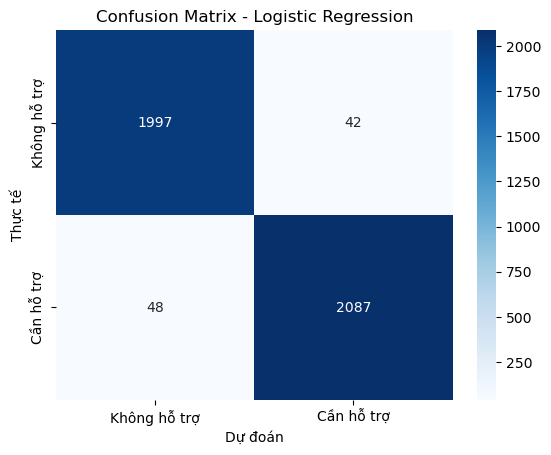

In [117]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv("train_70data.csv")
val_df = pd.read_csv("val_10data.csv")
test_df = pd.read_csv("test_20data.csv")


vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['comment'])
X_val = vectorizer.transform(val_df['comment'])
X_test = vectorizer.transform(test_df['comment'])

y_train = train_df['support']
y_val = val_df['support']
y_test = test_df['support']


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


y_pred = log_model.predict(X_test)
print(" Logistic Regression ")
print("KẾT QUẢ ĐÁNH GIÁ TRÊN TEST ")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Không hỗ trợ', 'Cần hỗ trợ'], yticklabels=['Không hỗ trợ', 'Cần hỗ trợ'])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Naive Bayes

 Naive Bayes 
 KẾT QUẢ ĐÁNH GIÁ TRÊN TEST 
              precision    recall  f1-score   support

           0     0.9665    0.9196    0.9424      2039
           1     0.9266    0.9696    0.9476      2135

    accuracy                         0.9451      4174
   macro avg     0.9465    0.9446    0.9450      4174
weighted avg     0.9461    0.9451    0.9451      4174



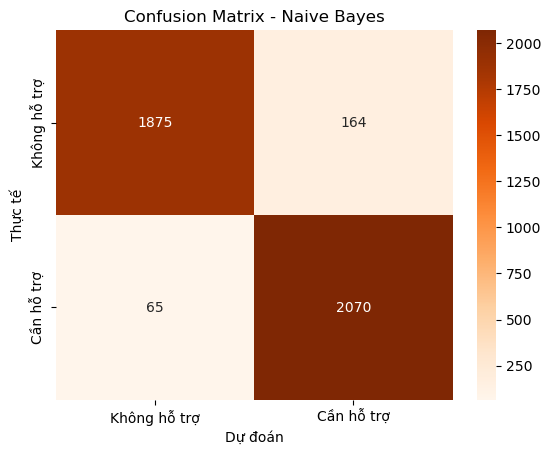

In [119]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv("train_70data.csv")
val_df = pd.read_csv("val_10data.csv")
test_df = pd.read_csv("test_20data.csv")


vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['comment'])
X_val = vectorizer.transform(val_df['comment'])
X_test = vectorizer.transform(test_df['comment'])

y_train = train_df['support']
y_val = val_df['support']
y_test = test_df['support']


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)
print(" Naive Bayes ")
print(" KẾT QUẢ ĐÁNH GIÁ TRÊN TEST ")
print(classification_report(y_test, y_pred, digits=4))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Không hỗ trợ', 'Cần hỗ trợ'], yticklabels=['Không hỗ trợ', 'Cần hỗ trợ'])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


## Random Forest

       Random Forest 
 KẾT QUẢ ĐÁNH GIÁ TRÊN TẬP TEST 
              precision    recall  f1-score   support

           0     0.8830    0.9545    0.9174       506
           1     0.9506    0.8738    0.9106       507

    accuracy                         0.9141      1013
   macro avg     0.9168    0.9142    0.9140      1013
weighted avg     0.9169    0.9141    0.9140      1013



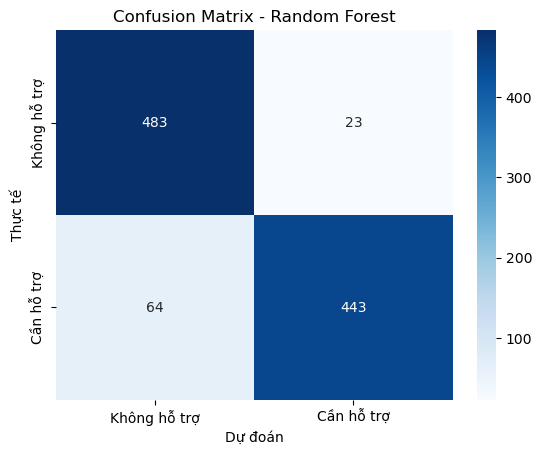

In [197]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Load dữ liệu mới =====
train_df = pd.read_csv("train_70data.csv")
test_df = pd.read_csv("support_comment_test_fix.csv") 

# ===== TF-IDF vectorization =====
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['comment'])
X_test = vectorizer.transform(test_df['comment'])

y_train = train_df['support']
y_test = test_df['support']

# ===== Huấn luyện mô hình Random Forest =====
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# ===== Dự đoán & đánh giá =====
y_pred = rf_model.predict(X_test)
print("       Random Forest ")
print(" KẾT QUẢ ĐÁNH GIÁ TRÊN TẬP TEST ")
print(classification_report(y_test, y_pred, digits=4))

# ===== Confusion Matrix =====
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Không hỗ trợ', 'Cần hỗ trợ'], 
            yticklabels=['Không hỗ trợ', 'Cần hỗ trợ'])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## XGBoost

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [14:18:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy (XGBoost): 0.9141
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0     0.9068    0.9229    0.9148       506
           1     0.9217    0.9053    0.9134       507

    accuracy                         0.9141      1013
   macro avg     0.9142    0.9141    0.9141      1013
weighted avg     0.9142    0.9141    0.9141      1013



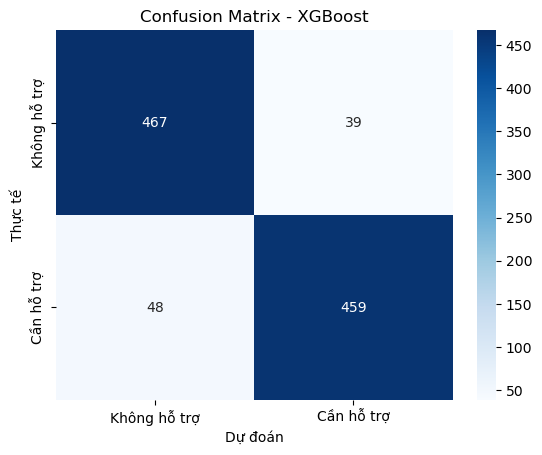

In [198]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
train_data = pd.read_csv('train_70data.csv')
test_data = pd.read_csv('support_comment_test_fix.csv')  # <-- tập test đã gộp val

X_train = train_data['comment']
y_train = train_data['support']
X_test = test_data['comment']
y_test = test_data['support']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Huấn luyện mô hình XGBoost
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train_tfidf, y_train)

# Dự đoán
y_pred = model_xgb.predict(X_test_tfidf)

# Đánh giá
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (XGBoost): {accuracy:.4f}")
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không hỗ trợ', 'Cần hỗ trợ'],
            yticklabels=['Không hỗ trợ', 'Cần hỗ trợ'])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - XGBoost")
plt.show()


## SVM

Accuracy (SVM): 0.9052
Classification Report (SVM):
              precision    recall  f1-score   support

           0     0.8942    0.9190    0.9064       506
           1     0.9168    0.8915    0.9040       507

    accuracy                         0.9052      1013
   macro avg     0.9055    0.9052    0.9052      1013
weighted avg     0.9055    0.9052    0.9052      1013



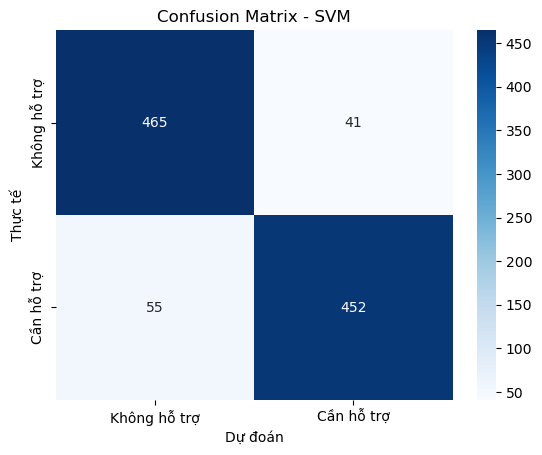

In [201]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
train_data = pd.read_csv('train_70data.csv')
test_data = pd.read_csv('support_comment_test_fix.csv')  # <-- dùng file đã gộp

X_train = train_data['comment']
y_train = train_data['support']
X_test = test_data['comment']
y_test = test_data['support']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Huấn luyện mô hình SVM
svm_model = SVC(probability=True, kernel='linear', random_state=42)  # nên chỉ rõ kernel
svm_model.fit(X_train_tfidf, y_train)

# Dự đoán
y_pred_svm = svm_model.predict(X_test_tfidf)

# Đánh giá
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.4f}")
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không hỗ trợ', 'Cần hỗ trợ'],
            yticklabels=['Không hỗ trợ', 'Cần hỗ trợ'])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - SVM")
plt.show()


In [34]:
import joblib

# Sau khi train:
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(model_xgb, 'xgb_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')  # Lưu vectorizer để dùng lại khi dự đoán


['tfidf_vectorizer.pkl']

In [36]:
import joblib

# Load mô hình
rf_model = joblib.load('rf_model.pkl')
model_xgb = joblib.load('xgb_model.pkl')
model_svm = joblib.load('svm_model.pkl')

# Load vectorizer (ví dụ: TfidfVectorizer)
vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [114]:
import pandas as pd
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import underthesea
from tensorflow.keras.models import load_model
model = load_model("support_model.keras")
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)
import numpy as np

def ensemble_predict(comment_text):

    processed = ' '.join(underthesea.word_tokenize(comment_text))
    tfidf_input = vectorizer.transform([processed])
    lstm_seq = tokenizer.texts_to_sequences([processed])
    lstm_pad = pad_sequences(lstm_seq, maxlen=100, padding='post', truncating='post')

    # Predict probabilities
    prob_xg = model_xgb.predict_proba(tfidf_input)[0][1]
    prob_rf = rf_model.predict_proba(tfidf_input)[0][1]
    prob_lstm = model.predict(lstm_pad)[0][0]
    svm_prob = model_svm.decision_function(tfidf_input)
    svm_prob = 1 / (1 + np.exp(-svm_prob))  # Sigmoid để convert về xác suất
    svm_prob = svm_prob[0]
    # Soft voting
    avg_prob = np.mean([prob_xg, prob_rf, prob_lstm,svm_prob])
    label = int(avg_prob > 0.5)

    print(f"\n Bình luận: {comment_text}")
    print(f" Xác suất trung bình: {avg_prob:.4f}")
    print(f" Dự đoán cuối cùng: {'Cần hỗ trợ (1)' if label == 1 else 'Không cần hỗ trợ (0)'}")
ensemble_predict("làm thế nào để giàu ạ")


1/1 [==============================] - 1s 1s/step

 Bình luận: làm thế nào để giàu ạ
 Xác suất trung bình: 0.1943
 Dự đoán cuối cùng: Không cần hỗ trợ (0)


In [195]:
dftest = pd.read_csv("./support_comment_test.csv")
print(len(dftest))
print(dftest.dtypes)

1013
comment    object
label      object
rate        int64
support     int64
dtype: object


In [197]:
#đưa về chữ thường
dftest["comment"] = dftest["comment"].str.lower()
dftest.head()

,comment,label,rate,support
0,mình cao m7 có mặc vừa không shop,NEU,3,1
1,"mua về mặc không vừa, trả hàng được không",NEU,3,1
2,tôi muốn trả hàng thì phải làm sao,NEU,3,1
3,chính sách đổi trả thế nào vậy shop,NEU,3,1
4,"tư vấn giúp em với, em nặng 50kg",NEU,3,1


In [199]:
#loại bỏ số
dftest["comment"] = dftest["comment"].astype(str).str.replace(r'\d+', '', regex=True)
dftest.head()

,comment,label,rate,support
0,mình cao m có mặc vừa không shop,NEU,3,1
1,"mua về mặc không vừa, trả hàng được không",NEU,3,1
2,tôi muốn trả hàng thì phải làm sao,NEU,3,1
3,chính sách đổi trả thế nào vậy shop,NEU,3,1
4,"tư vấn giúp em với, em nặng kg",NEU,3,1


In [201]:
#Loại bỏ dấu câu
dftest["comment"] = dftest["comment"].astype(str).str.replace(r'[^\w\s]', '', regex=True)

In [203]:
# Loại bỏ khoảng trắng dư thừa
dftest["comment"] = dftest["comment"].astype(str).str.replace(r'\s+', ' ', regex=True).str.strip()

In [205]:
# Loại bỏ các chữ cái giống nhau liên tiếp 
dftest["comment"] = dftest["comment"].astype(str).str.replace(r'(.)\1+', r'\1', regex=True)

In [207]:
# Tách từ trong cột 'comment'
from underthesea import word_tokenize
dftest["comment"] = dftest["comment"].apply(lambda x: word_tokenize(x))

print(dftest["comment"].head())

0            [mình, cao, m, có, mặc, vừa, không, shop]
1    [mua, về, mặc, không, vừa, trả, hàng, được, kh...
2           [tôi, muốn, trả, hàng, thì, phải, làm sao]
3           [chính sách, đổi, trả, thế nào, vậy, shop]
4                [tư vấn, giúp, em, với, em, nặng, kg]
Name: comment, dtype: object


In [208]:
#Chuẩn hóa dữ liệu
replace_list = {
       ':v':'hihi', '<3':'yêu', '♥️':'yêu','❤':'yêu','a':'anh','ac':'anh chị','ace':'anh chị em','ad':'quản lý',
       'ae':'anh em','ak':'à','amin':'quản lý','androir':'android','app':'ứng dụng','auto ':'tự động',
       'ây':'vậy','b nào':'bạn nào','bằg':'bằng','băng':'bằng','băp':'bắp','băt':'bắt','battery':'pin','bể':'vỡ',
       'been':'bên','best':'nhất','best':'tốt nhất','bgqafy ':'ngày','bh':'bao giờ','bh':'bây giờ','bhx':'bảo hành',
       'bi':'bị','big':'lớn','bik':'biết','bin':'pin','bit':'biết','bít':'biết','bn':'bạn','bông tróc':'bong tróc', 'k': 'không', 'ok': 'được',
       'bro':'anh em','bt':'bình thường','bt':'biết','bth':'bình thường','bthg':'bình thường','bua':'bữa','bùn':'buồn',
       'buonc':'buồn','bx':'hộp','bye':'tạm biệt','c':'chị','cac':'các','cam':'máy ảnh','card':'thẻ','châu':'khỏe',
       'chiệu':'triệu','chíp':'chip','chội':'trội','chs':'chơi','chửa':'chữa','chug ':'chung','chup':'chụp','chuq':'chung',
       'clip':'đoạn phim','cmt':'bình luận','co':'có','cở':'cỡ','cọc':'cột','cpu':'chíp xử lý','cty':'công ty',
       'cua':'của','cũg':'cũng','cug ':'cũng','cuh':'cũng','cùi':'tệ','củng':'cũng','cụt':'cục','cv':'công việc',
       'cx':'cũng','đ':' đồng','dag':'đang','dăng':'văng','dấp':'lỗi','dất':'rất','đay':'đấy','đâỳ':'đầy','đc':'được',
       'dè':'rè','dể':'dễ','delay':'trễ','dêm':'đêm','đén':'đến','deplay ':'chậm','deu':'đều','diem':'điểm','dien':'diện',
       'đien':'điển','điễn':'điển','dienmayxanh':'điện máy xanh','dín':'dính','dis':'văng','diss':'văng','dk':'được',
       'dmx':'điện máy xanh','dô':'vào','dõ':'rõ','dỡ':'dở','đỗi':'đổi','download':'tải','drop':'tụt','dt':'điện thoại',
       'đt':'điện thoại','đth':'điện thoại','đthoai':'điện thoại','du':'dù','dùg':'dùng','dừg':'dừng','đứg':'đứng',
       'dụg ':'dụng','dung':'dùng','đụng':'chạm','đươc':'được','đuọc ':'được','đưowjc':'được','dựt ':'giật','dx':'được'
       ,'đx':'được','đy':'đi','e':'em','ế':'không bán được','êm':'tốt','f':'facebook','fabook':'facebook',
       'face':'facebook','fast':'nhanh','fb':'facebook','fim':'phim','fix':'sửa','flash sale':'giảm giá','fm':'đài',
       'for what':'vì sao','fps':'tốc độ khung hình','full':'đầy','future':'tương lai','game':'trò chơi','gem':'trò chơi',
       'geme':'trò chơi','gia tiên':'giá tiền','giât':'giật','giốg ':'giống','giử':'dữ','giùm':'dùm','gmae':'trò chơi',
       'gởi':'gửi','gold':'vàng','gơn':'hơn','good':'tốt','good jup':'tốt','gop':'góp','gửa':'gửi','gủng':'cái','h':'giờ',
       'haiz':'thở dài','hẵn ':'hẳn','hành':'hành','hazzz':'haizz','hc':'học','hcm':'hồ chí minh','hd':'chất lượng cao',
       'hdh':'hệ điều hành','hđh':'hệ điều hành','headphone':'tai nghe','hên':'may mắn','hẻo':'yếu','hẹo':'yếu','het':'hết',
       'hét':'hết','hic':'khóc','hieu':'hiểu','high-tech':'công nghệ cao','hít':'sử dụng','hiu':'hiểu','hỉu':'hiểu',
       'hk':'không','hn':'hà nội','hnay':'hôm nay','hoài':'nhiều lần','hoi':'hơi','hới':'hơi','hời':'tốt',
       'hoi han':'hối hận','hok':'không','hong':'không','hông':'không','hot':'nổi bật','hqua':'hôm qua','hs':'học sinh',
       'hssv':'học sinh sinh viên','hut':'hút','huway ':'huawei','huwei ':'huawei','í':'ý','I like it':'tôi thích nó',
       'ik':'đi','ip':'iphone','j':'gì','k':'không','kàm':'làm','kb':'không biết','kg':'không','kh':'không',
       'khach':'khách hàng','khát phục':'khắc phục','khj':'khi','khoá ':'khóa','khóai ':'thích','khoẻ':'khỏe',
       'khoẽ':'khỏe','khôg':'không','khoi đong':'khởi động','khong':'không','khoong ':'không','khuân':'khuôn',
       'khủg':'khủng','kím':'kiếm','kipo':'tiêu cực','ko':'không','kt':'kiểm tra','ktra':'kiểm tra','la':'là',
       'lác':'lỗi','lắc':'lỗi','lag':'lỗi','laii':'lại','lak':'giật','lan':'lần','lãng':'giật','lap':'máy tính',
       'laptop':'máy tính','lay':'này','len toi':'lên tới','les':'led','lg':'lượng','lí':'lý','lien':'liên',
       'like':'thích','liti':'nhỏ','live stream':'phát sóng trực tiếp','lm':'làm','ln':'luôn','loadd':'tải ',
       'lôi':'lỗi','lổi':'lỗi','LOL ':'trò chơi','lởm':'kém chất lượng','lỏng lẽo':'lỏng lẻo','luc':'lúc','lun':'luôn',
       'luong':'lượng','luot':'lướt','lưot ':'lượt','m':'mình','mạ':'trời','mắc công':'mất công','macseger':'messenger',
       'mag':'màn','main':'chính','mak':'mà','man':'màn','màng':'màn','màng hình':'màn hình','mao ':'mau','mẩu':'mẫu',
       'mầu ':'màu','max':'lớn nhất','may':'máy','mèn':'màn','méo gì':'làm gì','mih':'mình','mìk':'mình','min':'nhỏ nhât',
       'mìn':'mình','mjh':'mình','mjk':'mình','mjnh':'minh','mk':'mình','mn':'mọi người','mng ':'mọi người','mo':'đâu',
       'mò':'tìm','mobile':'điện thoại','mog':'mong','moi':'mới','mơi':'mới','ms':'mới','mún':'muốn','mước':'mức',
       'mược':'mượt','muot':'mượt','mỷ':'mỹ','n':'nó','n':'nói chuyện','nãn':'nản','nayd':'này','nc':'nói chuyện',
       'nch':'nói chuyện','nch':'nói chung','nếo ':'nếu','ng':'người','ngan':'ngang','nge':'nghe','nghiêm':'nghiệm',
       'ngĩ':'nghĩ','ngốn':'sử dụng','nguon':'nguồn','nhah':'nhanh','nhan vien':'nhân viên','nhay':'nhạy','nhe':'nhé',
       'nhèo':'nhòe','nhiet':'nhiệt','nhiểu':'nhiều','nhiu':'nhiều','nhìu':'nhiều','nhoè':'nhòe','như v':'như vậy',
       'nhug':'nhưng','nhưg':'nhưng','nhữg':'những','nhung':'nhưng','nhuoc':'nhược','nhượt':'nhược','nock ao':'hạ gục',
       'noi':'nói','nống':'nóng','not':'lưu ý','ns ':'nói','nsx':'ngày sản xuất','nt':'nhắn tin','ntin':'nhắn tin',
       'ntn':'như thế nào','nũa':'nữa','nut ':'nút','nv':'nhân viên','nz':'như vậy','ô xi':'oxy','ofice':'văn phòng',
       'ok':'được','ôk':'được','oke':'được','okee':'được','oki':'được','okie':'được','onl':'sử dụng',
       'ộp ẹp':'không chắc chắn','option':'tùy chọn','or':'hoặc','out':'thoát','oỳ':'rồi','pải':'phải','phảm':'phẩm',
       'phẩn':'phẩm','phan van':'phân vân','phèo':'vậy','phut ':'phút','pít':'biết','pro':'chất lượng cao','pùn':'buồn',
       'pv':'giới thiệu','qá':'quá','qc':'quảng cáo','qtv':'quản trị viên','qua ve':'qua vẻ','quang trọng':'quan trọng',
       'qus':'quá','r ':'rồi','rat':'rất','rát':'rất','rắt':'rất','rata':'rất','rễ':'dễ','rep':'trả lời',
       'research':'nghiên cứu','reset':'cài đặt lại','restart':'khởi động lại','review':'đánh giá','rì':'gì',
       'rinh':'mua','rỏ':'rõ','rùi':'rồi','rùng':'dùng','s':'sao','sac':'sạc','sài':'xài','sài':'dùng','sale':'giảm giá',
       'sale off':'giảm giá','sâng':'sáng','sạt':'sạc','saving':'tiết kiệm','sd':'sử dụng','sdt':'số điện thoại',
       'seal':'mới','search':'tìm kiếm','sefil':'chụp ảnh','selfie':'chụp ảnh','setting':'cài đặt','setup':'cài đặt',
       'sexy':'quyến rũ','shiper':'nhân viên giao hàng','shop':'cửa hàng','skill':'kỹ năng','smooth':'mượt',
       'so good':'rất tốt','sp':'sản phẩm','sphẩm':'sản phẩm','stars':'sao','sử':'xử','suất':'xuất','sưj':'sự',
       'sước':'xước','super':'siêu','support':'hỗ trợ','sụt':'tụt','sv':'sinh viên','sx':'sản xuất','t':'tôi',
       'T G D Đ':'thế giới di động','tằm ':'tầm','tes':'kiểm tra','test':'kiểm tra','tet':'tết','teung':'trung',
       'tg':'thời gian','tgdd':'thế giới di động','tgdđ':'thế giới di động','thag':'tháng','thág':'tháng','ship':'giao','Ship':'giao',
       'kh':'không','mik':'mình','j':'gì','ah':'ạ','nhiu':'nhiêu','mk':'mình',
}
pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sorted(replace_list, key=lambda x: -len(x))) + r')\b')
def Util(text):
    return pattern.sub(lambda match: replace_list[match.group(0)], text.lower())
dftest['comment'] = dftest['comment'].astype(str).apply(Util)


dftest['comment'] = dftest['comment'].apply(lambda x: Util(x) if isinstance(x, str) else "")



dftest['comment'] = dftest['comment'].apply(Util)

In [211]:
#bỏ icon
import re

# Regex lọc emoji Unicode (emoji mặt cười, cờ, biểu tượng cảm xúc, động vật,...)
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # Mặt cười
    "\U0001F300-\U0001F5FF"  # Biểu tượng khác
    "\U0001F680-\U0001F6FF"  # Vận chuyển
    "\U0001F1E0-\U0001F1FF"  # Cờ các nước
    "\U00002700-\U000027BF"  # Các ký hiệu khác
    "\U000024C2-\U0001F251"
    "]+",
    flags=re.UNICODE
)

def remove_emojis(text):
    if not isinstance(text, str):
        return ""
    return emoji_pattern.sub(r'', text)
dftest['comment'] = dftest['comment'].apply(remove_emojis)


In [213]:
dftest.head()

,comment,label,rate,support
0,"['mình', 'cao', 'mình', 'có', 'mặc', 'vừa', 'k...",NEU,3,1
1,"['mua', 'về', 'mặc', 'không', 'vừa', 'trả', 'h...",NEU,3,1
2,"['tôi', 'muốn', 'trả', 'hàng', 'thì', 'phải', ...",NEU,3,1
3,"['chính sách', 'đổi', 'trả', 'thế nào', 'vậy',...",NEU,3,1
4,"['tư vấn', 'giúp', 'em', 'với', 'em', 'nặng', ...",NEU,3,1


In [215]:
dftest.to_csv("support_comment_test_fix.csv")
dftest.head()

,comment,label,rate,support
0,"['mình', 'cao', 'mình', 'có', 'mặc', 'vừa', 'k...",NEU,3,1
1,"['mua', 'về', 'mặc', 'không', 'vừa', 'trả', 'h...",NEU,3,1
2,"['tôi', 'muốn', 'trả', 'hàng', 'thì', 'phải', ...",NEU,3,1
3,"['chính sách', 'đổi', 'trả', 'thế nào', 'vậy',...",NEU,3,1
4,"['tư vấn', 'giúp', 'em', 'với', 'em', 'nặng', ...",NEU,3,1


In [217]:
import pandas as pd

# Load file test, giả sử có cột 'content' chứa câu và 'label' = 1
df_test = pd.read_csv("test_support_only.csv")

X_test_text = df_test['comment']
y_test = df_test['support']  # toàn 1


In [438]:
X_test_vectorized = vectorizer.transform(X_test_text)


In [931]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(name, model, X, y_true):
    y_pred = model.predict(X)
    print(f"== {name} ==")
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, zero_division=0))
    print("---------------")

evaluate_model("SVM", model_svm, X_test_vectorized, y_test)
evaluate_model("Random Forest", rf_model, X_test_vectorized, y_test)
evaluate_model("XGBoost", model_xgb, X_test_vectorized, y_test)


ValueError: X has 3643 features, but SVC is expecting 3093 features as input.

In [40]:
import pandas as pd
import numpy as np
import joblib
import pickle
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ===== Load mô hình & tokenizer =====
rf_model = joblib.load('rf_model.pkl')
xgb_model = joblib.load('xgb_model.pkl')
svm_model = joblib.load('svm_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')
lstm_model = load_model('support_model.keras')

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# ===== Load dữ liệu test =====
df = pd.read_csv("merged_test_val.csv")  # tên file test
texts = df['comment'].astype(str).tolist()
y_true = df['support'].values  # toàn bộ là 1

# ===== Predict với 3 model ML =====
X_tfidf = vectorizer.transform(texts)

rf_probs = rf_model.predict_proba(X_tfidf)[:, 1]
xgb_probs = xgb_model.predict_proba(X_tfidf)[:, 1]
svm_probs = svm_model.predict_proba(X_tfidf)[:, 1]

# ===== Predict với LSTM =====
seqs = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(seqs, maxlen=100, padding='post', truncating='post')
lstm_probs = lstm_model.predict(padded, verbose=0).reshape(-1)

# ===== Voting soft =====
all_probs = np.vstack([rf_probs, xgb_probs, svm_probs, lstm_probs])
final_probs = np.mean(all_probs, axis=0)
final_preds = (final_probs > 0.5).astype(int)

# ===== In kết quả đánh giá =====
print(" Voting Soft LSTM - Random Forest - SVM - XGBoost:\n")
print(classification_report(y_true, final_preds, digits=4))

# ===== Lưu kết quả nếu muốn =====
df['probability'] = final_probs
df['prediction'] = final_preds
df.to_csv("test_results_only_support.csv", index=False)
print("\n Đã lưu kết quả vào test_results_only_support.csv")


 Voting Soft LSTM - Random Forest - SVM - XGBoost:

              precision    recall  f1-score   support

           0     0.9789    0.9940    0.9864      3313
           1     0.9943    0.9801    0.9872      3574

    accuracy                         0.9868      6887
   macro avg     0.9866    0.9870    0.9868      6887
weighted avg     0.9869    0.9868    0.9868      6887


 Đã lưu kết quả vào test_results_only_support.csv


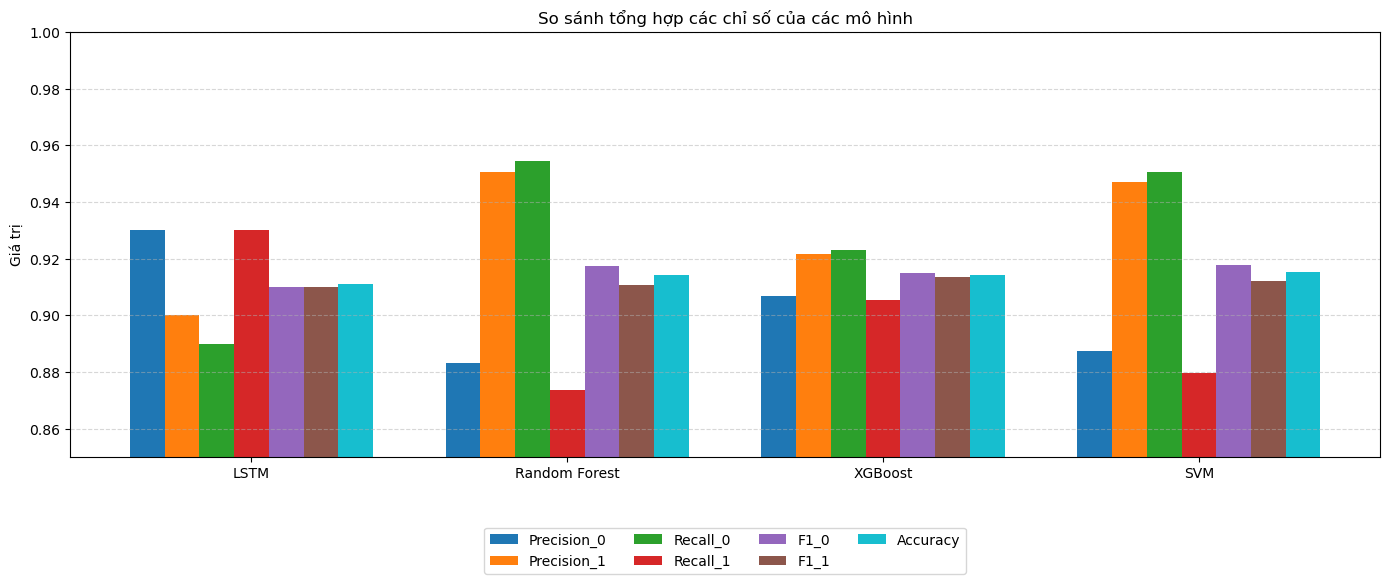

In [181]:
import numpy as np
import matplotlib.pyplot as plt

models = ['LSTM', 'Random Forest', 'XGBoost', 'SVM']
x = np.arange(len(models))

precision_0 = [0.93, 0.8830, 0.9068, 0.8875]
precision_1 = [0.90, 0.9506, 0.9217, 0.9469]
recall_0    = [0.89, 0.9545, 0.9229, 0.9506]
recall_1    = [0.93, 0.8738, 0.9053, 0.8797]
f1_0        = [0.91, 0.9174, 0.9148, 0.9179]
f1_1        = [0.91, 0.9106, 0.9134, 0.9121]
accuracy    = [0.9112, 0.9141, 0.9141, 0.9151]

metrics = [precision_0, precision_1, recall_0, recall_1, f1_0, f1_1, accuracy]
metric_labels = ['Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1_0', 'F1_1', 'Accuracy']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf']

bar_width = 0.11
offsets = np.arange(len(metrics)) * bar_width - (len(metrics)/2 - 0.5) * bar_width

plt.figure(figsize=(14, 6))
for i, (metric, label, color) in enumerate(zip(metrics, metric_labels, colors)):
    plt.bar(x + offsets[i], metric, width=bar_width, label=label, color=color)

plt.xticks(x, models)
plt.ylim(0.85, 1.0)
plt.ylabel("Giá trị")
plt.title("So sánh tổng hợp các chỉ số của các mô hình")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


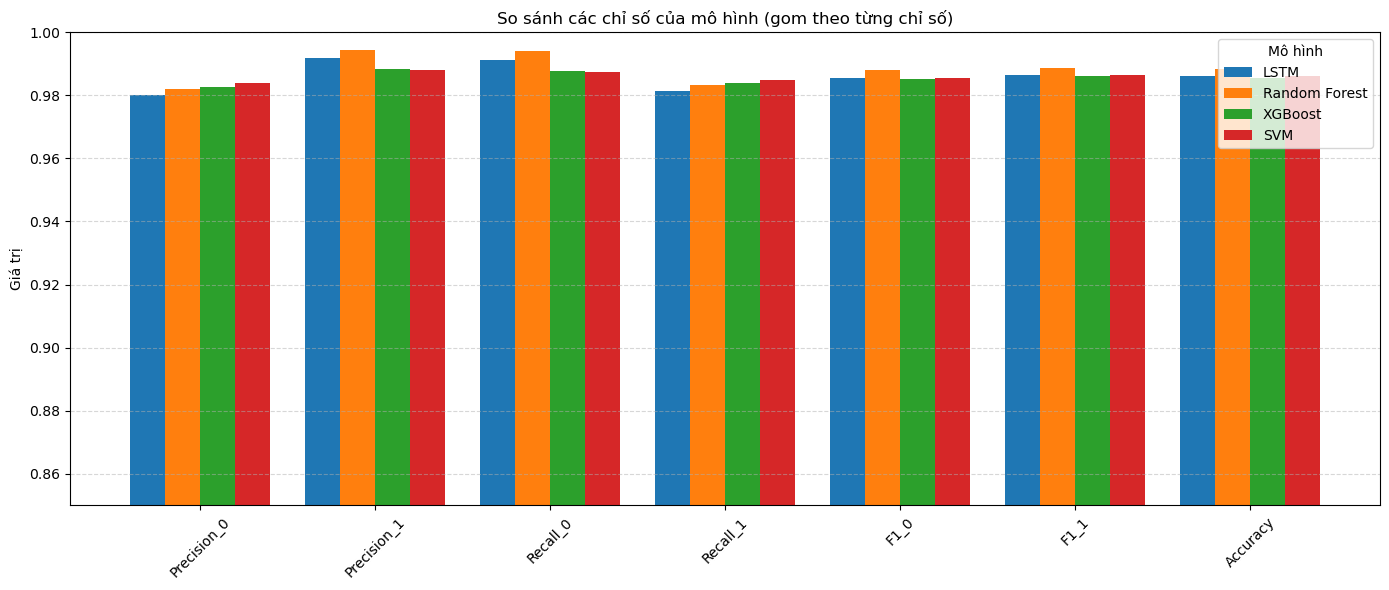

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Tên mô hình
models = ['LSTM', 'Random Forest', 'XGBoost', 'SVM']

# Dữ liệu
precision_0 = [0.9800, 0.9821, 0.9826, 0.9838]
precision_1 = [0.9918, 0.9943, 0.9885, 0.9882]
recall_0    = [0.9912, 0.9940, 0.9876, 0.9873]
recall_1    = [0.9813, 0.9832, 0.9838, 0.9849]
f1_0        = [0.9856, 0.9880, 0.9851, 0.9855]
f1_1        = [0.9865, 0.9887, 0.9861, 0.9865]
accuracy    = [0.9861, 0.9884, 0.9856, 0.9861]

# Gom theo nhóm chỉ số (Precision_0, Precision_1, ..., Accuracy)
metrics = [
    precision_0,
    precision_1,
    recall_0,
    recall_1,
    f1_0,
    f1_1,
    accuracy
]

metric_labels = ['Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1_0', 'F1_1', 'Accuracy']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Tạo các cột
x = np.arange(len(metric_labels))  # mỗi chỉ số là một cụm
bar_width = 0.2

plt.figure(figsize=(14, 6))
for i in range(len(models)):
    # Tại mỗi chỉ số, vẽ 1 cột đại diện cho 1 model
    data = [metric[i] for metric in metrics]
    plt.bar(x + i * bar_width, data, width=bar_width, label=models[i], color=colors[i % len(colors)])

# Trục x
plt.xticks(x + bar_width * 1.5, metric_labels, rotation=45)
plt.ylim(0.85, 1.0)
plt.ylabel("Giá trị")
plt.title("So sánh các chỉ số của mô hình (gom theo từng chỉ số)")
plt.legend(title="Mô hình", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
